In [2]:
from scipy import signal
import pandas as pd
import numpy as np
from pandas_datareader import data
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import yticks
import seaborn as sns
sns.set()
from sklearn.preprocessing import normalize, scale

In [3]:
def download_financial_data(name, source,
                            startdate = '2010-01-01',
                            enddate = '2012-01-01'
#                             startdate = '2018-01-01', 
#                             enddate = dt.date.today()
                           ):
    df = data.DataReader(name, source,startdate, enddate)
    return df

def download_adj_close(name, source, 
                       startdate = '2000-01-01', 
                       enddate = dt.date.today()):
    return download_financial_data(name, source, startdate, enddate)['Adj Close']

def get_logreturns(df):
    delt = ((df.index.shift(1,'B')-df.index).to_series().dt.days).values
    return np.log(df/df.shift(1))/np.sqrt(delt)

Text(0, 0.5, 'period')

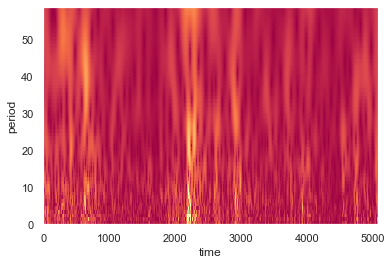

In [4]:
SPY = download_adj_close('SPY', 'yahoo')
rSPY = get_logreturns(SPY)


rSPY = rSPY.dropna()

widths = np.arange(1,60)
# f = 1/dt
# freq = np.linspace(0, f/2, 5071)
cwtm = signal.cwt(rSPY, signal.morlet2, widths, dtype = 'complex128')

acwtm = np.abs(cwtm)
plt.pcolormesh(acwtm,  cmap = 'Spectral') #extent = [-10,10,0,10],
plt.xlabel('time')
plt.ylabel('period')

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


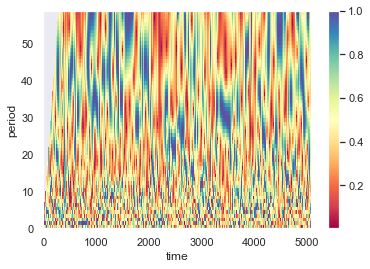

In [5]:
XOM = download_adj_close('XOM', 'yahoo')
rXOM = get_logreturns(XOM)
XOM = XOM.dropna()

cwtm = signal.cwt(rXOM, signal.morlet2, widths, dtype = 'complex128')
acwtm = np.abs(cwtm)
plt.pcolormesh(acwtm/np.nanmax(acwtm,0),  cmap = 'Spectral') #extent = [-10,10,0,10],
plt.xlabel('time')
plt.ylabel('period')
plt.colorbar()

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


(59, 2439)

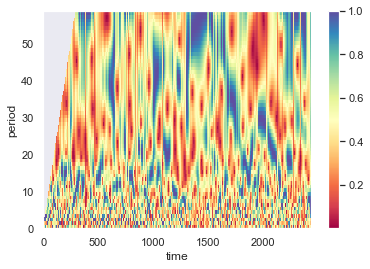

In [6]:
TSLA = download_adj_close('TSLA', 'yahoo')
rTSLA = get_logreturns(TSLA)
TSLA = TSLA.dropna()

cwtm = signal.cwt(rTSLA, signal.morlet2, widths, dtype = 'complex128')
acwtm = np.abs(cwtm)
plt.pcolormesh(acwtm/np.nanmax(acwtm,0),  cmap = 'Spectral') #extent = [-10,10,0,10],
plt.xlabel('time')
plt.ylabel('period')
plt.colorbar()
cwtm.shape

In [182]:
def showchart(ticker, period = 60, back = 1000):
    raw = download_adj_close(ticker, 'yahoo')
    ret = get_logreturns(raw).dropna()
    period = min(period, len(ret))
    widths = np.arange(1,period)
    cwtm = signal.cwt(ret, signal.morlet2, widths, dtype = 'complex128')
    acwtm = np.abs(cwtm)
    fig, ((a, b), (c,d)) = plt.subplots(figsize = (9,9),ncols = 2, nrows = 2)
#     fig.figsize(8,8)
    x = np.arange(0, len(ret),1)
    freq = 1/np.arange(1, period+1, 1)
#     xfreq = np.meshgrid(x, freq)
    
    bacwtm = acwtm[:, -back:]
    
    sc = b.pcolormesh( (acwtm/np.nanmax(acwtm,0))[:,-back:],  cmap = 'Spectral') #extent = [-10,10,0,10],
    
    usc = a.pcolormesh(bacwtm,  cmap = 'Spectral') #extent = [-10,10,0,10],
    b.set_xlabel('time')
    b.set_ylabel('period')
    sns.lineplot(widths, bacwtm.max(1), ax = c)
    sigmean = bacwtm.mean(1)
    sns.lineplot(widths, sigmean, ax = c)
    sns.lineplot(widths, np.median(bacwtm,1), ax = c)
    
    
    sns.lineplot(widths,bacwtm.min(1), ax = c)
#     sd = d.plot(widths, acwtm[:,-back:].std(1)/sigmean)
    sns.lineplot(widths, bacwtm.std(1)/sigmean, ax = d)
    c.set_xlabel('frequency')
    c.set_ylabel('energy')
    c.legend(['max','mean','median','min'])
    d.set_title('Size of std vs mu as fraction')
    d.set_ylim(0,)
    c.set_ylim(0,)
    c.set_xlim(0, period)
    d.set_xlim(0,period)
    fig.colorbar(usc, ax = a)
    fig.colorbar(sc, ax=b)
    plt.show(fig)
    plt.close(fig)
    print("min of max:", min(bacwtm.max(1)),"max of min:",max(bacwtm.min(1)))

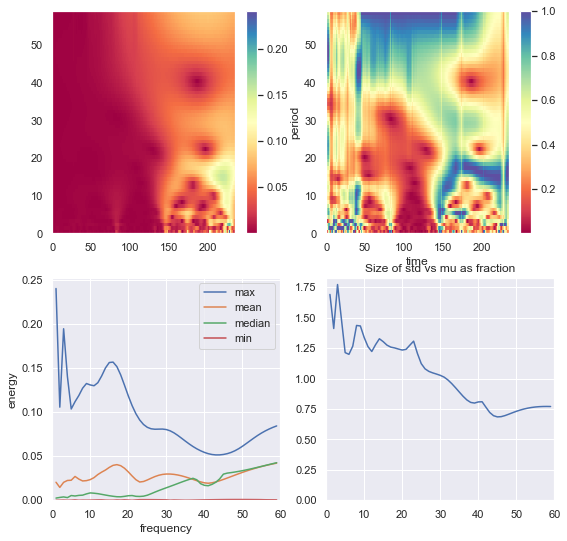

min of max: 0.051583727094603536 max of min: 0.0008835306013654671


In [183]:
showchart('SPCE')

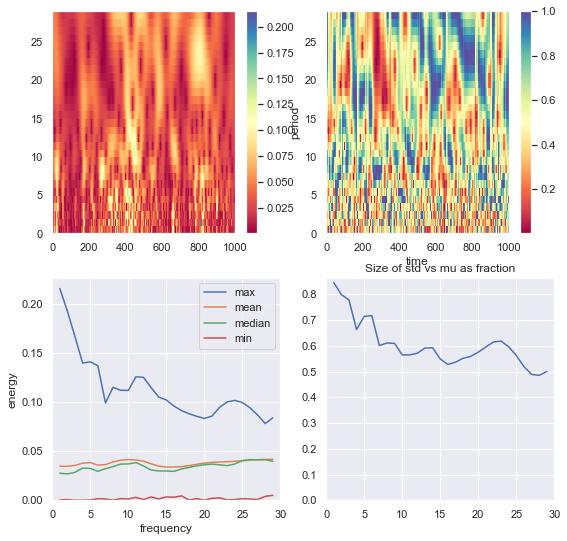

min of max: 0.07798744823223867 max of min: 0.00507298691680722


In [184]:
showchart('BTCUSD=X',30)

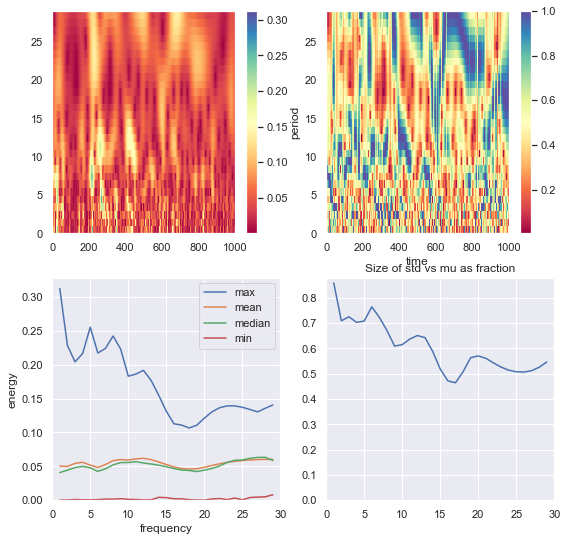

In [144]:
showchart('ETHUSD=X',30)

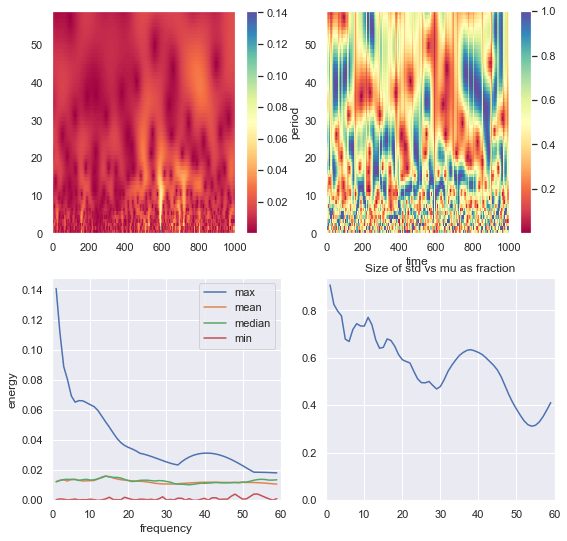

In [145]:
showchart('FB')

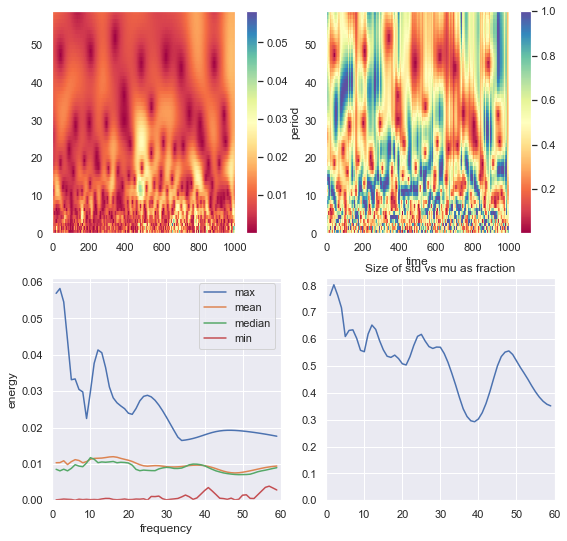

min of max: 0.016439788384323355 max of min: 0.003886904463344666


In [185]:
showchart('GOOG')

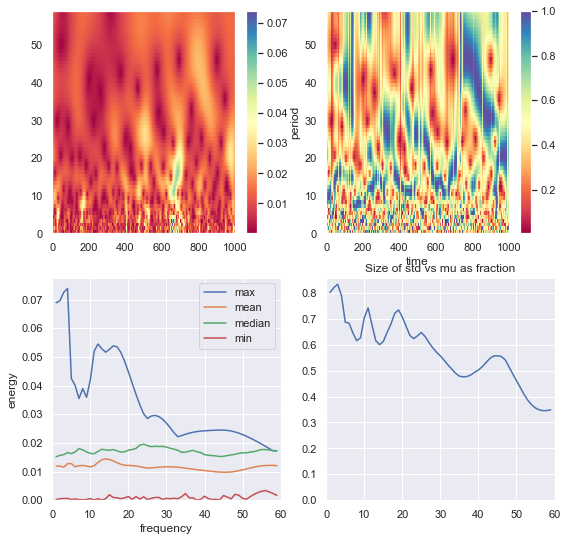

In [147]:
showchart('AMZN')

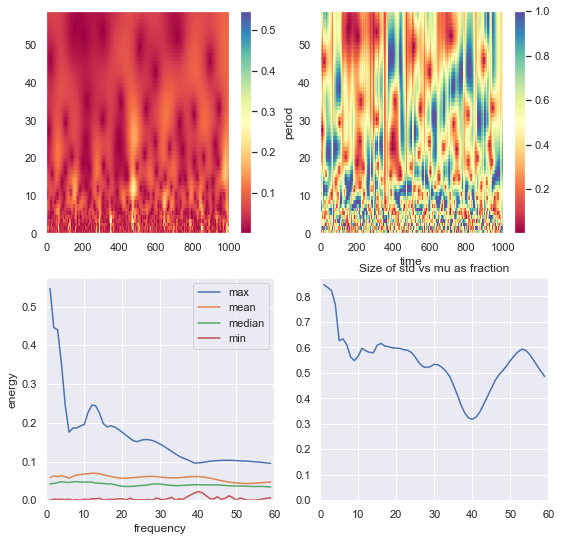

In [148]:
showchart('^VIX')

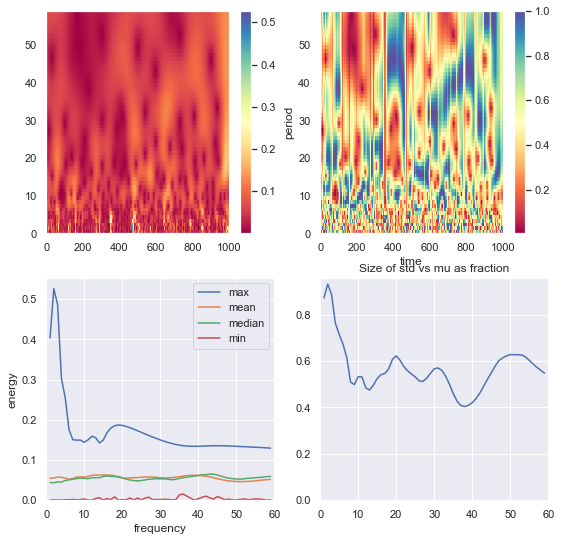

In [149]:
showchart('TVIX')

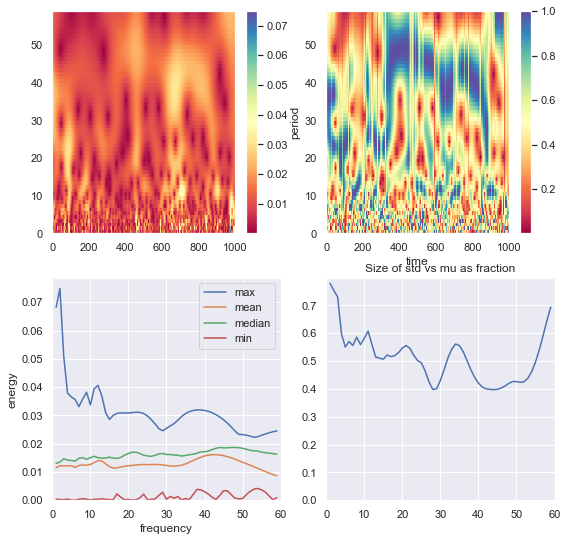

In [150]:
showchart('F')

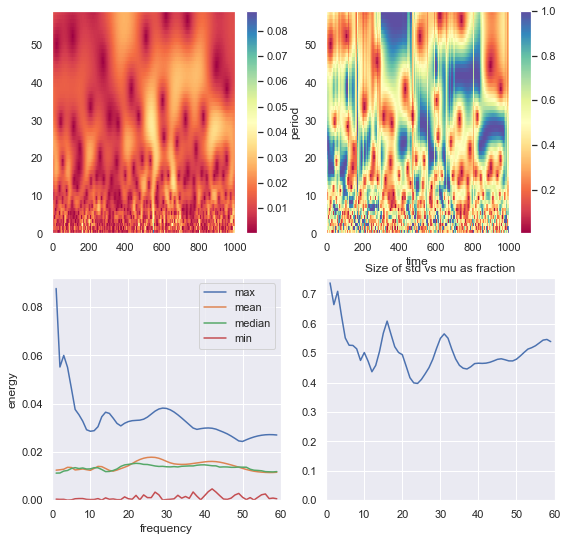

In [151]:
showchart('GM')

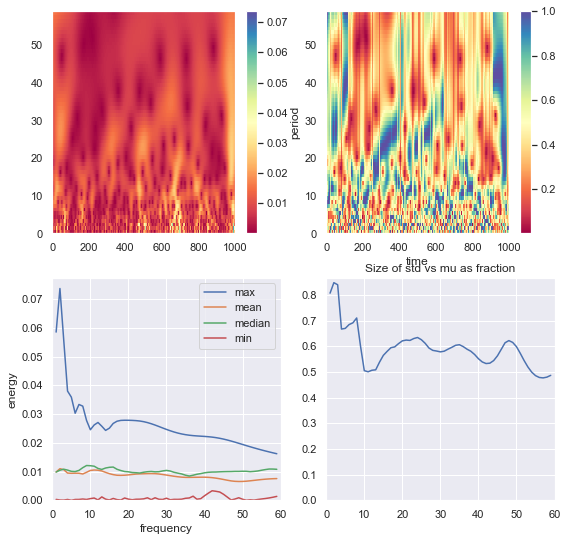

In [152]:
showchart('MSFT')

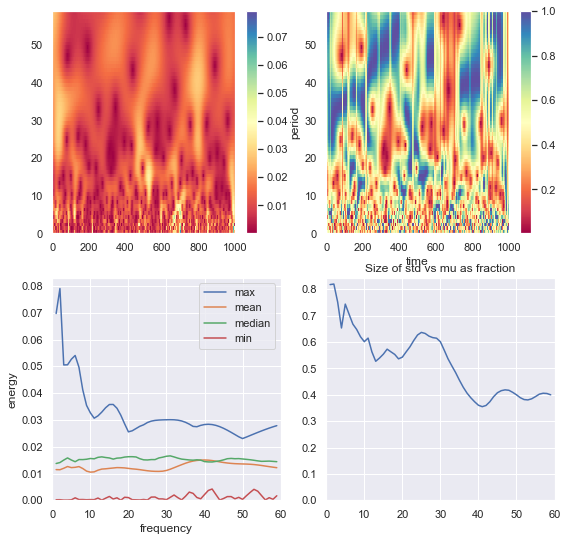

In [153]:
showchart('AAPL')

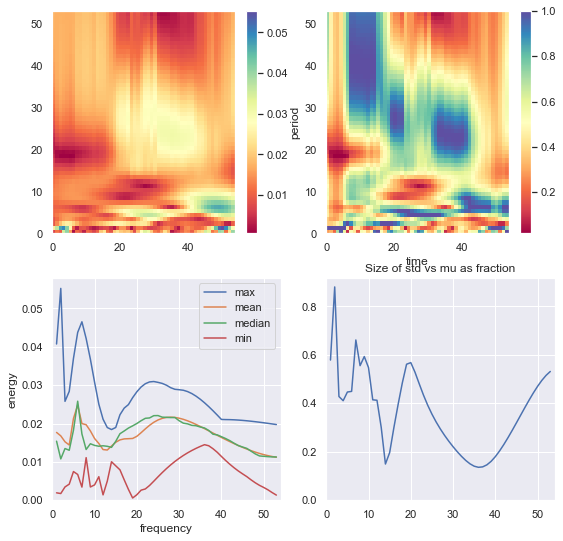

In [178]:
showchart('HO=F')

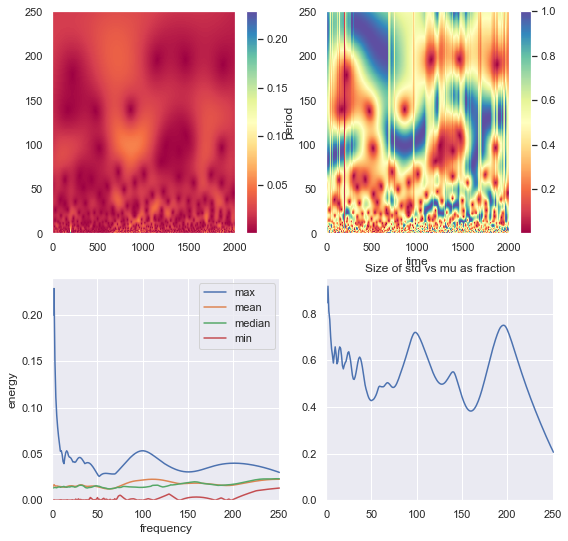

In [155]:
showchart('CRUD.L',252, 2000)

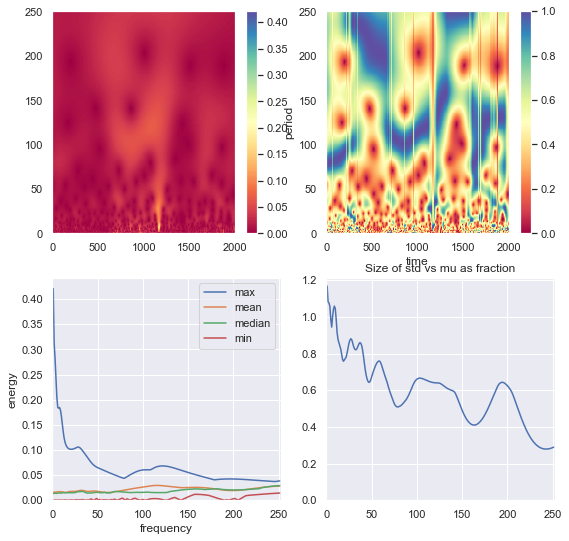

In [156]:
showchart('OIL', 252,2000)

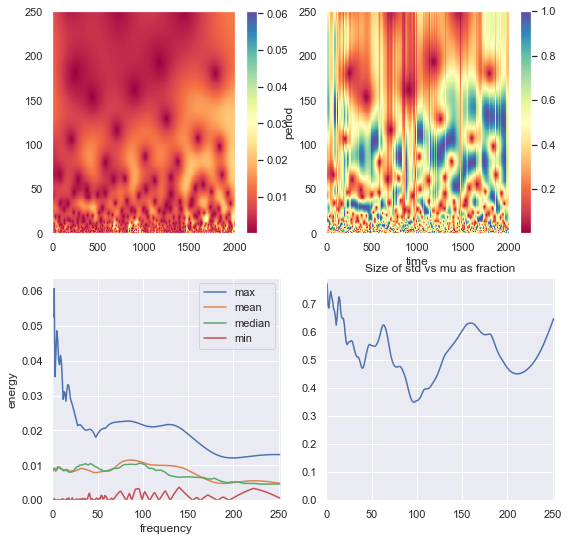

In [157]:
showchart('XOM', 252,2000)

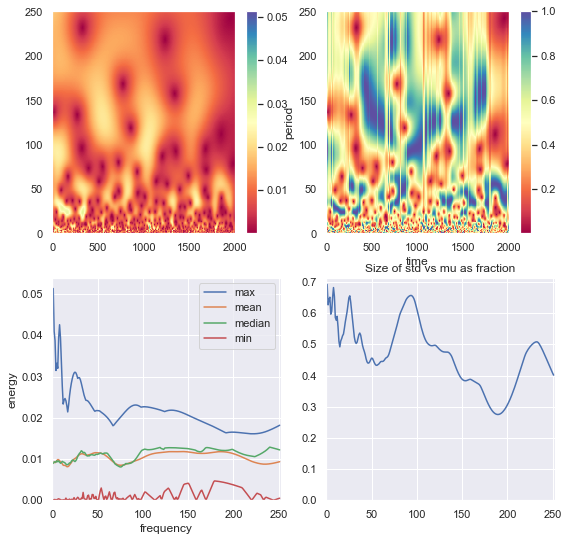

In [158]:
showchart('SOYB.L',252, 2000)

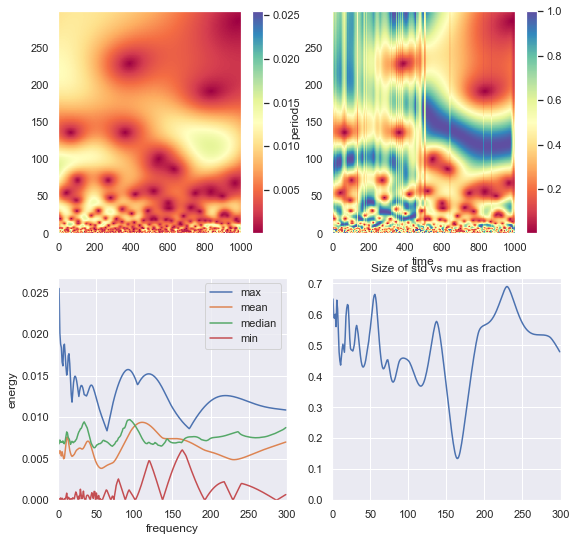

In [159]:
showchart('GLD', 300)

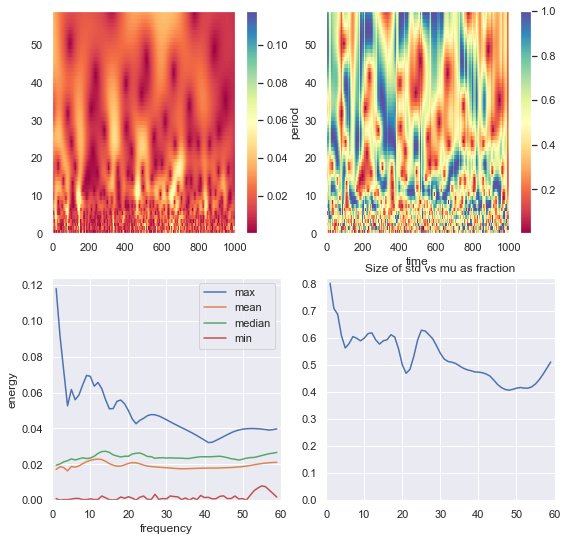

In [160]:
showchart('NFLX')

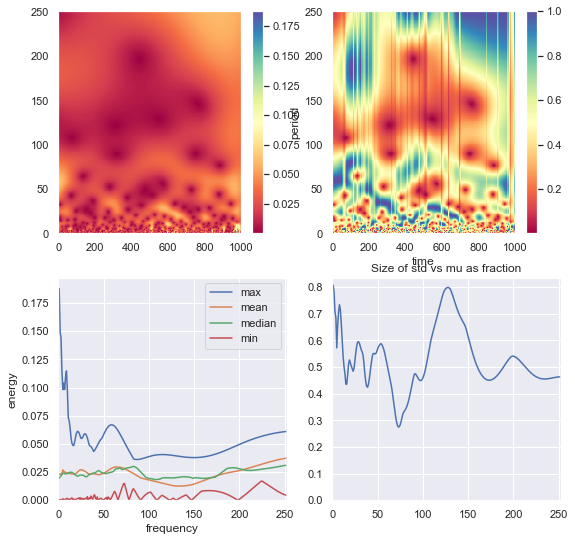

In [162]:
showchart('TSLA', 252)

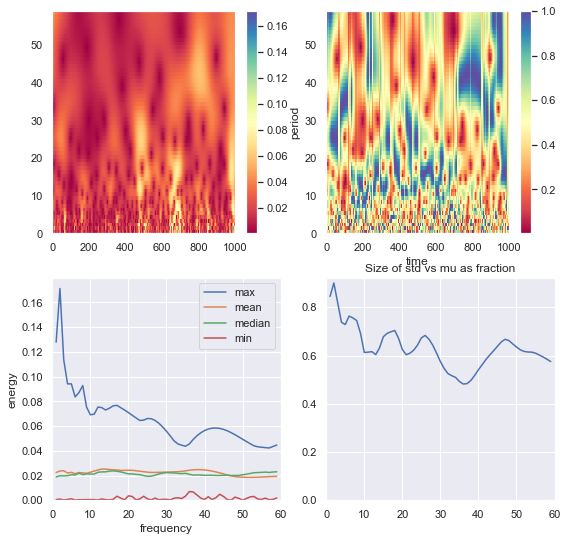

In [163]:
showchart('TQQQ')

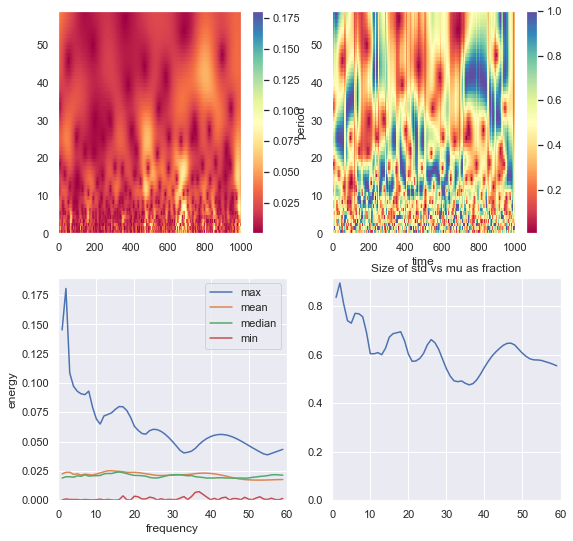

In [164]:
showchart('SQQQ')

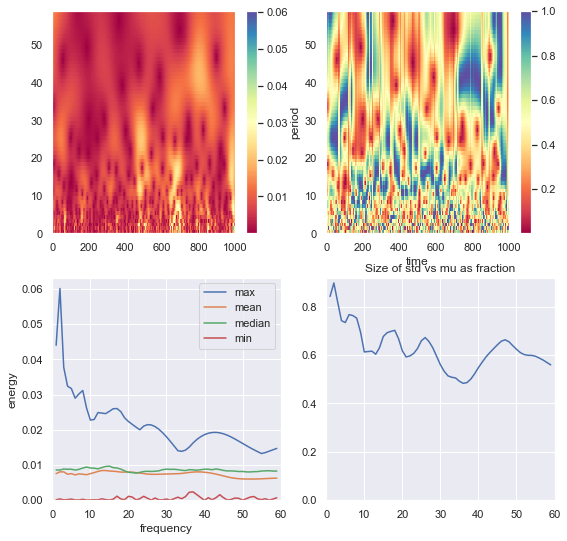

In [165]:
showchart('QQQ')

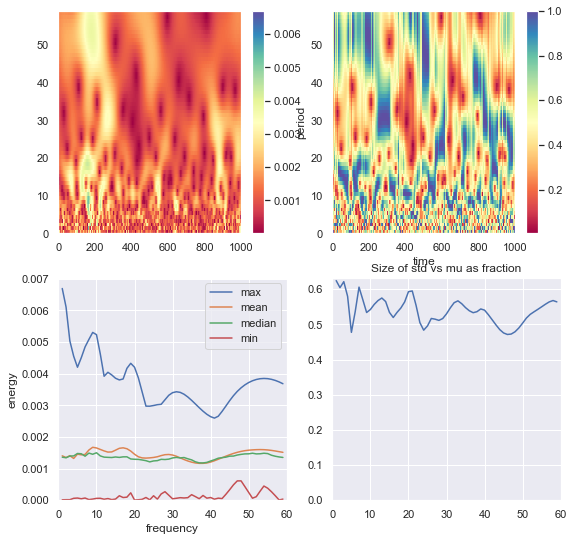

In [166]:
showchart('BOND')

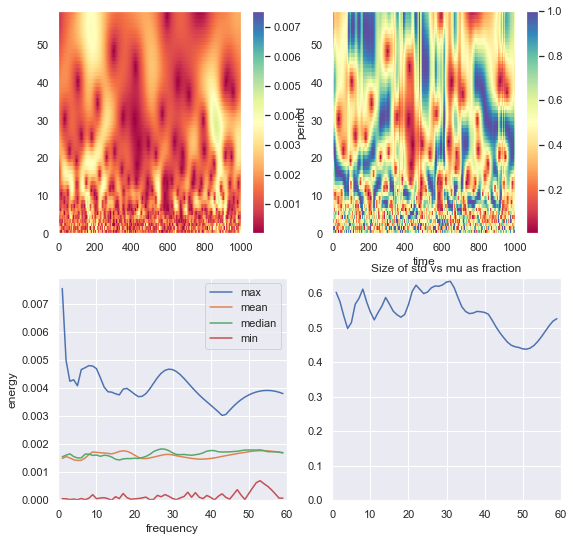

In [167]:
showchart('BND')

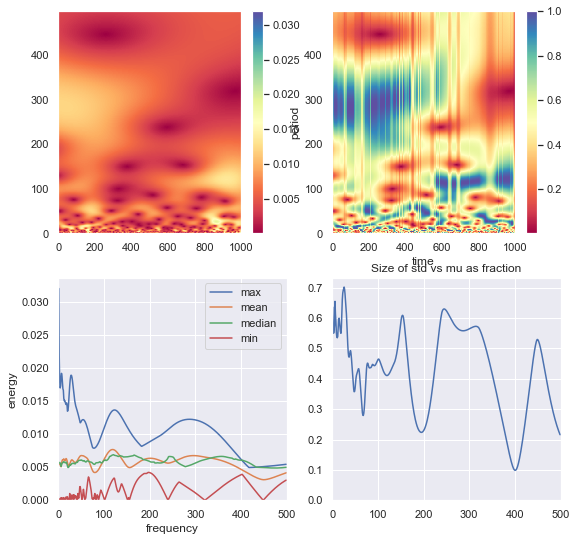

In [168]:
showchart('TLT',500,1000)

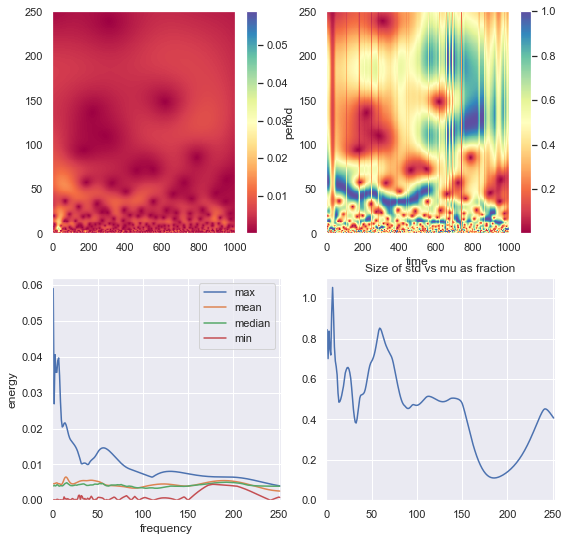

In [169]:
showchart('GBPUSD=X',252)

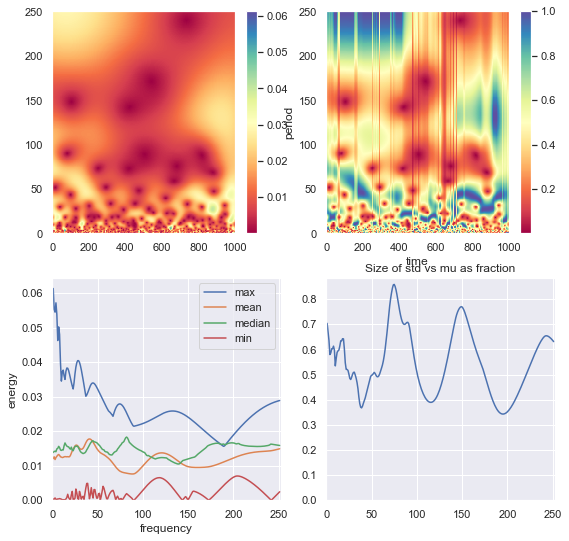

In [170]:
showchart('MS',252)

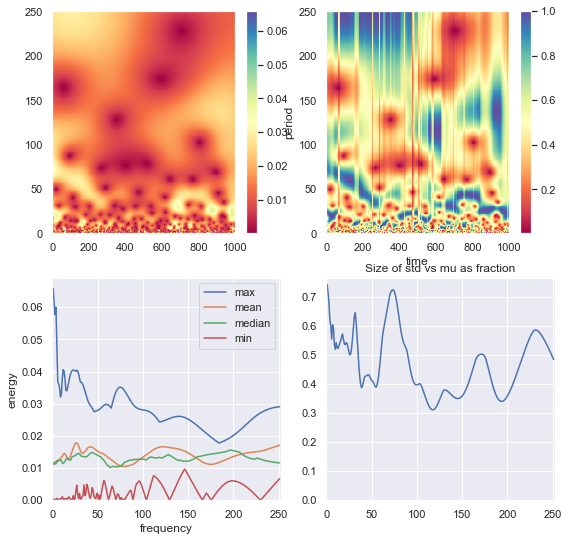

In [171]:
showchart('BAC',252)

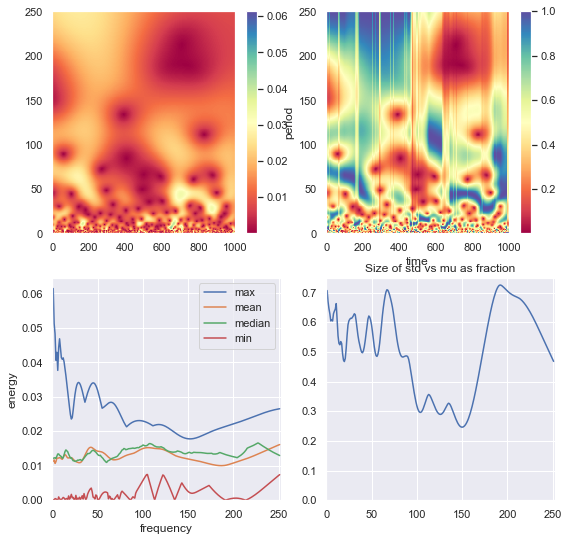

In [172]:
showchart('GS', 252)

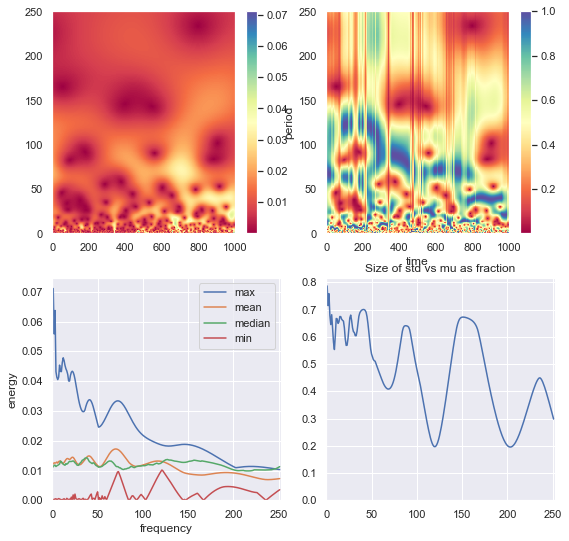

In [173]:
showchart('BA',252)

In [47]:
faket = np.arange(0,1000,1)
fakesignal = np.sin(faket/100*np.pi) + np.sin(faket/200*np.pi) + 2*np.sin(faket/10*np.pi)

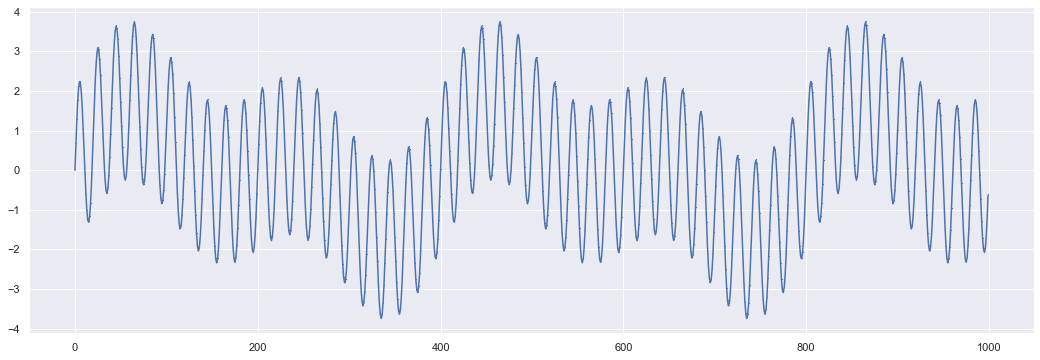

In [48]:
plt.figure(figsize = (18,6))
plt.plot(faket, fakesignal, '-,')


In [49]:
widths = np.arange(1,500,1)
cwtm = signal.cwt(fakesignal, signal.morlet2,  widths, 
                  dtype = 'complex128')
acwtm = np.abs(cwtm)

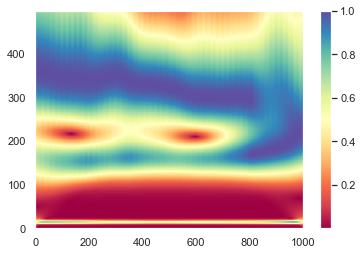

In [50]:
plt.pcolormesh( (acwtm/np.nanmax(acwtm,0))[:],  cmap = 'Spectral')
plt.colorbar()
# plt.ylabel(widths)

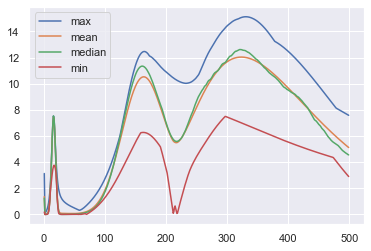

In [175]:
plt.plot(widths, acwtm.max(1))
plt.plot(widths, acwtm.mean(1))
plt.plot(widths, np.median(acwtm,1))
plt.plot(widths, acwtm.min(1))
plt.legend(['max','mean','median','min'])